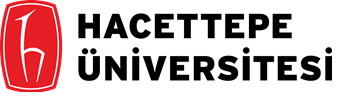

# <u> Meta-analysis of Turkish Energy and Climate Pathways </u>

## By Görkem Güngör and Latife Demirtaş



## Scope and feature overview

The **Turkey National Energy Plan** (TUEP) modeling horizon is 2035 based on the net-zero target in 2053.

The **pyam** package is used for for analyzing, visualizing and working with timeseries data following the format established by the *Integrated Assessment Modeling Consortium* ([IAMC](https://www.iamconsortium.org)); [read the docs](https://pyam-iamc.readthedocs.io/en/stable/data.html) for more information.


## Highlights

The main themes for the **Turkey National Energy Plan** and the **Turkey Hydrogen Strategy and Road-Map** modeling horizon 2035 are:

- Final renewable energy includes solar, biomass and geothermal
- Hydrogen and synthetic methane are clean fuels 
- Hydrogen is produced in the electrolyser, whereas DAC using CCS produces synthetic methane after 2035
- Final natural gas is blended by 3.5% with hydrogen for final sectoral demand
- Secondary renewable electricity includes solar, wind, hydro, biomass and geothermal
- Although the emissions are not specified, the plan is based on the net-zero carbon emission target for 2053 
- Battery storage has 2 hours charging period.


## Capacity projections

|Installed capacity|unit|2030|2035|2055|
|----------------|-----|----|----|----|
|Solar power|GW||52.9 (59.7[<sup id="IPC">1</sup>](#fn1-back))||
|Wind power|GW||29.6 (50.1[<sup id="IPC">1</sup>](#fn1-back))||
|Nuclear power|GW||7.2 (4.8[<sup id="IPC">1</sup>](#fn1-back))||
|New installed capacity|GW||96.9||
|Total installed capacity|GW||187.9 (202.1[<sup id="IPC">1</sup>](#fn1-back))||
|Battery storage|GW||7.5||
|Electrolyser|GW|2.0|5.0|70.0|
|Demand side management|GW||1.7||

[<sup id="IPC">1</sup>](#fn1-back) Capacity projections of Istanbul Policy Center for Net-Zero Scenario


##  Data

The timeseries data used in this notebook are manually assembled from Gray and Academic literature. The main report from the academic literature is the *Türkiye National Energy Plan* ([TUEP](https://enerji.gov.tr/Media/Dizin/EIGM/tr/Raporlar/TUEP/T%C3%BCrkiye_National_Energy_Plan.pdf)) of the Ministry of Energy and Natural Resources.

### Scenarios in the data

The scenarios included in the Gray literature are:

 - Energy Security Scenario from the Ministry of Energy and Natural Resources (2023) *Türkiye National Energy Plan*
 - Baseline and Net-Zero Scenarios from Istanbul Policy Center (2021) *Turkey's Decarbonization Pathway*
 - Baseline, Optimistic and Pessimistic Scenarios from TÜBİTAK-MAM (2012) *Mitigation / Adaptation scenarios and Climate Change policy portfolios for Turkey*
 
 
<div class="alert alert-warning">

This notebook is intended for meta-analysis of Turkish energy and climate pathways from the literature.

</div>

***

In [1]:
import numpy as np
import pyam
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

## Import data from file and inspect the scenario

We import the snapshot of the timeseries data from the file ``data.csv``.

<div class="alert alert-info">

If you haven't cloned the [GitHub repository](https://github.com/gorkemgungormetu/turkish_energy_and_climate_pathways.git) to your machine, you can download the file
from GitHub [data](https://github.com/gorkemgungormetu/turkish_energy_and_climate_pathways/data.csv).  
Make sure to place the file in the same folder as this notebook.

</div>

In [20]:
df = pyam.IamDataFrame(data='data.csv')

pyam.core - INFO: Reading file data.csv


As a first step, we show an overview of the **IamDataFrame** content by simply calling `df` (alternatively, you can use `print(df)` or [df.info()](https://pyam-iamc.readthedocs.io/en/stable/api/iamdataframe.html#pyam.IamDataFrame.info)).

This function returns a concise (abbreviated) overview of the index dimensions and the qualitative/quantitative meta indicators (see an explanation of indicators below).

In [21]:
df

<class 'pyam.core.IamDataFrame'>
Index:
 * model    : IPC (2021), MENR (2006), MENR (2023), TUBITAK (2012) (4)
 * scenario : Baseline Scenario, CO2 Scenario, Net-Zero Scenario, ... Pessimistic Scenario (5)
Timeseries data coordinates:
   region   : Turkey (1)
   variable : Emissions|CO2, Final Energy, ... Secondary Energy|Electricity|Wind (47)
   unit     : Mt CO2/yr, Mtoe/yr, TWh/yr (3)
   year     : 2010, 2020, 2030, 2040, 2050, 2055, 2070 (7)
   type     : CGE, Linear Programming, Market Based Simulation, Regression Analysis (4)
Meta indicators:
   exclude (bool) False (1)

In the following cells, we display the lists of all models, scenarios, regions, and the mapping of variables to  units in the snapshot.

In [22]:
df.model

['IPC (2021)', 'MENR (2006)', 'MENR (2023)', 'TUBITAK (2012)']

In [23]:
df.scenario

['Baseline Scenario',
 'CO2 Scenario',
 'Net-Zero Scenario',
 'Optimistic Scenario',
 'Pessimistic Scenario']

In [24]:
df.region

['Turkey']

In [25]:
df.unit_mapping

{'Emissions|CO2': 'Mt CO2/yr',
 'Final Energy': 'Mtoe/yr',
 'Final Energy|Agriculture': 'Mtoe/yr',
 'Final Energy|Agriculture|Electricity': 'TWh/yr',
 'Final Energy|Commercial': 'Mtoe/yr',
 'Final Energy|Electricity': ['TWh/yr', 'Mtoe/yr'],
 'Final Energy|Gases': 'Mtoe/yr',
 'Final Energy|Heat': 'Mtoe/yr',
 'Final Energy|Hydrogen': 'TWh/yr',
 'Final Energy|Industry': 'Mtoe/yr',
 'Final Energy|Industry|Electricity': 'TWh/yr',
 'Final Energy|Liquids': 'Mtoe/yr',
 'Final Energy|Non-Energy': 'Mtoe/yr',
 'Final Energy|Other': 'Mtoe/yr',
 'Final Energy|Renewables': 'Mtoe/yr',
 'Final Energy|Residential': 'Mtoe/yr',
 'Final Energy|Residential|Electricity': 'TWh/yr',
 'Final Energy|Services|Electricity': 'TWh/yr',
 'Final Energy|Solids': 'Mtoe/yr',
 'Final Energy|Transportation': 'Mtoe/yr',
 'Final Energy|Transportation|Electricity': 'TWh/yr',
 'Primary Energy': 'Mtoe/yr',
 'Primary Energy|Biomass': 'Mtoe/yr',
 'Primary Energy|Coal': 'Mtoe/yr',
 'Primary Energy|Gas': 'Mtoe/yr',
 'Primary Energ

We convert the units **Mtoe/yr** and **TWh/yr** to **EJ/yr** compliant with the IAMC template.

In [26]:
df.convert_unit('Mtoe/yr', to='EJ/yr', inplace=True)
df.convert_unit('TWh/yr', to='EJ/yr', inplace=True)

In [27]:
df.unit_mapping

{'Emissions|CO2': 'Mt CO2/yr',
 'Final Energy': 'EJ/yr',
 'Final Energy|Agriculture': 'EJ/yr',
 'Final Energy|Agriculture|Electricity': 'EJ/yr',
 'Final Energy|Commercial': 'EJ/yr',
 'Final Energy|Electricity': 'EJ/yr',
 'Final Energy|Gases': 'EJ/yr',
 'Final Energy|Heat': 'EJ/yr',
 'Final Energy|Hydrogen': 'EJ/yr',
 'Final Energy|Industry': 'EJ/yr',
 'Final Energy|Industry|Electricity': 'EJ/yr',
 'Final Energy|Liquids': 'EJ/yr',
 'Final Energy|Non-Energy': 'EJ/yr',
 'Final Energy|Other': 'EJ/yr',
 'Final Energy|Renewables': 'EJ/yr',
 'Final Energy|Residential': 'EJ/yr',
 'Final Energy|Residential|Electricity': 'EJ/yr',
 'Final Energy|Services|Electricity': 'EJ/yr',
 'Final Energy|Solids': 'EJ/yr',
 'Final Energy|Transportation': 'EJ/yr',
 'Final Energy|Transportation|Electricity': 'EJ/yr',
 'Primary Energy': 'EJ/yr',
 'Primary Energy|Biomass': 'EJ/yr',
 'Primary Energy|Coal': 'EJ/yr',
 'Primary Energy|Gas': 'EJ/yr',
 'Primary Energy|Geothermal|Electricity': 'EJ/yr',
 'Primary Energy|G

## Apply filters to the ensemble and display the timeseries data

A selection of the timeseries data  of an **IamDataFrame** can be obtained by applying the [filter()](https://pyam-iamc.readthedocs.io/en/stable/api/iamdataframe.html#pyam.IamDataFrame.filter) function,
which takes keyword-arguments of criteria.
The function returns a down-selected clone of the **IamDataFrame** instance.

### Filtering by model names, scenarios and regions

The feature for filtering by **model, scenario or region** 
are implemented using exact string matching, where ``*`` can be used as a wildcard.

First, we want to display the list of all scenarios in TUEP.

> Applying the filter argument ``model='MENR'`` will return an empty array  
> (because the model in the data is actually called **MENR (2023)**)

In [28]:
df.filter(model='MENR').scenario

pyam.core - WARNING: Filtered IamDataFrame is empty!


[]

Filtering for ``model='MENR*'`` will return all scenarios provided by the **Ministry of Energy and Natural Resources**.

In [29]:
df.filter(model='MENR*').scenario

['Baseline Scenario', 'CO2 Scenario']

### Inverting the selection

Using the keyword `keep=False` allows you to select the inverse of the filter arguments. We can see that our data only contains information for region *Turkey*.

In [30]:
df.filter(region='Turkey').region

['Turkey']

In [31]:
df.filter(region='Turkey', keep=False).region

pyam.core - WARNING: Filtered IamDataFrame is empty!


[]

### Filtering by variables and levels

Filtering for **variable** strings works in an identical way as above,
with ``*`` available as a wildcard.

> Filtering for ``Primary Energy`` will return only exactly those data

> Filtering for ``Primary Energy|*`` will return all sub-categories of 
> primary energy (and only the sub-categories)

In addition, variables can be filtered by their **level**,
i.e., the "depth" of the variable in a hierarchical reading of the string separated by `|` (*pipe*, not L or i).
That is, the variable ``Primary Energy`` has level 0, while ``Primary Energy|Coal`` has level 1.

Filtering by both **variables** and **level** will search for the hierarchical depth 
_following the variable string_ so filter arguments ``variable='Primary Energy*'`` and ``level=1``
will return all variables immediately below ``Primary Energy``.
Filtering by **level** only will return all variables at that depth.

In [32]:
df.filter(variable='Primary Energy*', level=1).variable

['Primary Energy|Biomass',
 'Primary Energy|Coal',
 'Primary Energy|Gas',
 'Primary Energy|Hydro',
 'Primary Energy|Nuclear',
 'Primary Energy|Oil',
 'Primary Energy|Solar',
 'Primary Energy|Wind',
 'Primary Energy|Renewables']

The next cell illustrates another use case of the **level** filter argument - filtering by `1-` (as string) instead of `1` (as integer) will return all timeseries data for variables *up to* the specified depth.

In [33]:
df.filter(variable='Primary Energy*', level='1-').variable

['Primary Energy',
 'Primary Energy|Biomass',
 'Primary Energy|Coal',
 'Primary Energy|Gas',
 'Primary Energy|Hydro',
 'Primary Energy|Nuclear',
 'Primary Energy|Oil',
 'Primary Energy|Solar',
 'Primary Energy|Wind',
 'Primary Energy|Renewables']

The last cell shows how to filter only by **level** without providing a **variable** argument.
The example returns all variables that are at the second hierarchical level (i.e., not ``Primary Energy``).

In [34]:
df.filter(level=1).variable

['Emissions|CO2',
 'Final Energy|Electricity',
 'Final Energy|Hydrogen',
 'Final Energy|Agriculture',
 'Final Energy|Gases',
 'Final Energy|Industry',
 'Final Energy|Liquids',
 'Final Energy|Non-Energy',
 'Final Energy|Other',
 'Final Energy|Renewables',
 'Final Energy|Residential',
 'Final Energy|Solids',
 'Final Energy|Transportation',
 'Primary Energy|Biomass',
 'Primary Energy|Coal',
 'Primary Energy|Gas',
 'Primary Energy|Hydro',
 'Primary Energy|Nuclear',
 'Primary Energy|Oil',
 'Primary Energy|Solar',
 'Primary Energy|Wind',
 'Secondary Energy|Electricity',
 'Final Energy|Commercial',
 'Final Energy|Heat',
 'Primary Energy|Renewables']

### Displaying timeseries data

As a next step, we want to view a selection of the timeseries data.

<div class="alert alert-info">

The [timeseries()](https://pyam-iamc.readthedocs.io/en/stable/api/iamdataframe.html#pyam.IamDataFrame.timeseries) function
returns the data as a [pandas.DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) in the standard IAMC template.  
This is a **wide format** table where years are shown as columns.

</div>

In [39]:
display_df = df.filter(model='MENR*', variable='Primary Energy*', level=1, region='Turkey')
display_df.timeseries()

2010  \
model       scenario          region variable                  unit  type                                
MENR (2006) Baseline Scenario Turkey Primary Energy|Biomass    EJ/yr Market Based Simulation  0.167472   
                                     Primary Energy|Coal       EJ/yr Market Based Simulation  0.975524   
                                     Primary Energy|Gas        EJ/yr Market Based Simulation  0.008374   
                                     Primary Energy|Hydro      EJ/yr Market Based Simulation  0.209340   
                                     Primary Energy|Nuclear    EJ/yr Market Based Simulation       NaN   
                                     Primary Energy|Oil        EJ/yr Market Based Simulation  0.083736   
                                     Primary Energy|Solar      EJ/yr Market Based Simulation  0.020934   
                                     Primary Energy|Wind       EJ/yr Market Based Simulation  0.016747   
MENR (2023) CO2 Scenario      Turkey Primary Energy|Coal       EJ/yr Linear Programming            NaN   
                                     Primary Energy|Gas        EJ/yr Linear Programming            NaN   
                                     Primary Energy|Nuclear    EJ/yr Linear Programming            NaN   
                                     Primary Energy|Oil        EJ/yr Linear Programming            NaN   
                                     Primary Energy|Renewables EJ/yr Linear Programming            NaN   

                                                                                                  2020  \
model       scenario          region variable                  unit  type                                
MENR (2006) Baseline Scenario Turkey Primary Energy|Biomass    EJ/yr Market Based Simulation  0.167472   
                                     Primary Energy|Coal       EJ/yr Market Based Simulation  1.561676   
                                     Primary Energy|Gas        EJ/yr Market Based Simulation  0.008374   
                                     Primary Energy|Hydro      EJ/yr Market Based Simulation  0.376812   
                                     Primary Energy|Nuclear    EJ/yr Market Based Simulation  0.334944   
                                     Primary Energy|Oil        EJ/yr Market Based Simulation  0.041868   
                                     Primary Energy|Solar      EJ/yr Market Based Simulation  0.041868   
                                     Primary Energy|Wind       EJ/yr Market Based Simulation  0.041868   
MENR (2023) CO2 Scenario      Turkey Primary Energy|Coal       EJ/yr Linear Programming       1.699841   
                                     Primary Energy|Gas        EJ/yr Linear Programming       1.666346   
                                     Primary Energy|Nuclear    EJ/yr Linear Programming            NaN   
                                     Primary Energy|Oil        EJ/yr Linear Programming       1.766830   
                                     Primary Energy|Renewables EJ/yr Linear Programming       1.029953   

                                                                                                  2030  \
model       scenario          region variable                  unit  type                                
MENR (2006) Baseline Scenario Turkey Primary Energy|Biomass    EJ/yr Market Based Simulation       NaN   
                                     Primary Energy|Coal       EJ/yr Market Based Simulation       NaN   
                                     Primary Energy|Gas        EJ/yr Market Based Simulation       NaN   
                                     Primary Energy|Hydro      EJ/yr Market Based Simulation       NaN   
                                     Primary Energy|Nuclear    EJ/yr Market Based Simulation       NaN   
                                     Primary Energy|Oil        EJ/yr Market Based Simulation       NaN   
                                     Primary Energy|Solar      EJ/yr

In [40]:
type(display_df)

pyam.core.IamDataFrame

##### Filtering by year

Filtering for **years** can be done by one integer value, a list of integers, or the Python class [range](https://docs.python.org/3/library/stdtypes.html#ranges).

<div class="alert alert-info">

The last year of a range is not included, so `range(2020, 2050)`<br />
is interpreted as `[2020, 2030, 2040]`.

</div>

The next cell shows the same down-selected **IamDataFrame** as above, but further reduced to three timesteps.

In [41]:
display_df.filter(year=range(2020,2050)).timeseries()

2020  \
model       scenario          region variable                  unit  type                                
MENR (2006) Baseline Scenario Turkey Primary Energy|Biomass    EJ/yr Market Based Simulation  0.167472   
                                     Primary Energy|Coal       EJ/yr Market Based Simulation  1.561676   
                                     Primary Energy|Gas        EJ/yr Market Based Simulation  0.008374   
                                     Primary Energy|Hydro      EJ/yr Market Based Simulation  0.376812   
                                     Primary Energy|Nuclear    EJ/yr Market Based Simulation  0.334944   
                                     Primary Energy|Oil        EJ/yr Market Based Simulation  0.041868   
                                     Primary Energy|Solar      EJ/yr Market Based Simulation  0.041868   
                                     Primary Energy|Wind       EJ/yr Market Based Simulation  0.041868   
MENR (2023) CO2 Scenario      Turkey Primary Energy|Coal       EJ/yr Linear Programming       1.699841   
                                     Primary Energy|Gas        EJ/yr Linear Programming       1.666346   
                                     Primary Energy|Nuclear    EJ/yr Linear Programming            NaN   
                                     Primary Energy|Oil        EJ/yr Linear Programming       1.766830   
                                     Primary Energy|Renewables EJ/yr Linear Programming       1.029953   

                                                                                                  2030  
model       scenario          region variable                  unit  type                               
MENR (2006) Baseline Scenario Turkey Primary Energy|Biomass    EJ/yr Market Based Simulation       NaN  
                                     Primary Energy|Coal       EJ/yr Market Based Simulation       NaN  
                                     Primary Energy|Gas        EJ/yr Market Based Simulation       NaN  
                                     Primary Energy|Hydro      EJ/yr Market Based Simulation       NaN  
                                     Primary Energy|Nuclear    EJ/yr Market Based Simulation       NaN  
                                     Primary Energy|Oil        EJ/yr Market Based Simulation       NaN  
                                     Primary Energy|Solar      EJ/yr Market Based Simulation       NaN  
                                     Primary Energy|Wind       EJ/yr Market Based Simulation       NaN  
MENR (2023) CO2 Scenario      Turkey Primary Energy|Coal       EJ/yr Linear Programming       2.005477  
                                     Primary Energy|Gas        EJ/yr Linear Programming       1.997104  
                                     Primary Energy|Nuclear    EJ/yr Linear Programming       0.334944  
                                     Primary Energy|Oil        EJ/yr Linear Programming       2.294366  
                                     Primary Energy|Renewables EJ/yr Linear Programming       1.699841

### Parallels to the *pandas* data analysis toolkit

When developing **pyam**, we followed the syntax of the Python package **pandas** ([read the docs](https://pandas.pydata.org)) closely where possible. In many cases, you can use similar functions directly on the **IamDataFrame**.

In the next cell, we illustrate this parallel behaviour. The function [pyam.IamDataFrame.head()](https://pyam-iamc.readthedocs.io/en/stable/api/iamdataframe.html#pyam.IamDataFrame.head) is similar to [pandas.DataFrame.head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html): 
it returns the first n rows of the 'data' table in **long format** (columns are in year/value format).

Similar to the [timeseries()](https://pyam-iamc.readthedocs.io/en/stable/api/iamdataframe.html#pyam.IamDataFrame.timeseries) function shown above, the returned object of [head()](https://pyam-iamc.readthedocs.io/en/stable/api/iamdataframe.html#pyam.IamDataFrame.head) is a [pandas.DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html).

In [42]:
display_df.head()

,model,scenario,region,variable,unit,year,type,value
0,MENR (2006),Baseline Scenario,Turkey,Primary Energy|Biomass,EJ/yr,2010,Market Based Simulation,0.167472
1,MENR (2006),Baseline Scenario,Turkey,Primary Energy|Biomass,EJ/yr,2020,Market Based Simulation,0.167472
2,MENR (2006),Baseline Scenario,Turkey,Primary Energy|Coal,EJ/yr,2010,Market Based Simulation,0.975524
3,MENR (2006),Baseline Scenario,Turkey,Primary Energy|Coal,EJ/yr,2020,Market Based Simulation,1.561676
4,MENR (2006),Baseline Scenario,Turkey,Primary Energy|Gas,EJ/yr,2010,Market Based Simulation,0.008374


In [43]:
type(display_df.head())

pandas.core.frame.DataFrame

### Getting help

When in doubt, you can look at the help for any function by appending a ``?``.

In [44]:
df.filter?

## Visualize timeseries data using the plotting library

This section provides an illustrative example of the plotting features of the **pyam** package.

In the next cell, we show a simple line plot of global CO2 emissions. The colours are assigned randomly by default, and **pyam** deactivates the legend if there are too many lines.

<AxesSubplot: title={'center': 'region: Turkey'}, xlabel='Year', ylabel='EJ/yr'>

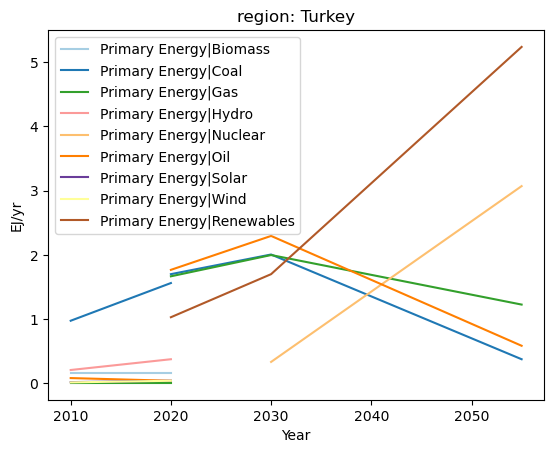

In [48]:
%%capture --no-display
cmap = 'Paired'
display_df.filter(region='Turkey').plot(color='variable', cmap=cmap)

The section on categorization will show more options of the plotting features, as well as a method to set specific colors for different categories. For more information, look at the other tutorials and the [plotting gallery](https://pyam-iamc.readthedocs.io/en/stable/gallery/index.html).

## Visualize timeseries data using the plotting library

This section provides an illustrative example of the plotting features of the **pyam** package.

In the next cell, we show a simple line plot of estimated CO2 emissions. The colours are assigned randomly by default, and **pyam** deactivates the legend if there are too many lines.

C:\Users\ggungor\Miniconda3\envs\message_env\lib\site-packages\pyam\plotting.py:1073: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col, data in df.iteritems():


<AxesSubplot: title={'center': 'region: Turkey - variable: Emissions|CO2'}, xlabel='Year', ylabel='Mt CO2/yr'>

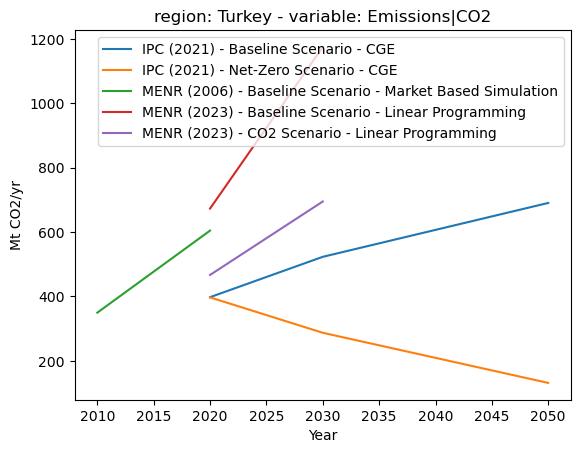

In [49]:
df.filter(variable='Emissions|CO2', region='Turkey').plot()

## Perform scenario diagnostic and validation checks

When analyzing scenario results, it is often useful to check whether certain timeseries data exist or the values are within a specific range.
For example, it may make sense to ensure that reported data for historical periods are close to established reference data or that near-term developments are reasonable.

Before diving into the diagnostics and validation features, we need to briefly introduce the 'meta' table.
This attribute of an **IamDataFrame** is a [pandas.DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html), which can be used to store categorization information and quantitative indicators of each model-scenario.
Per default, a new **IamDataFrame** will contain a column `exclude`, which is set to `False` for all model-scenarios.

The next cell shows the first 10 rows of the 'meta' table.

In [50]:
df.meta.head(10)

exclude
model          scenario                     
IPC (2021)     Baseline Scenario       False
               Net-Zero Scenario       False
MENR (2006)    Baseline Scenario       False
MENR (2023)    Baseline Scenario       False
               CO2 Scenario            False
TUBITAK (2012) Baseline Scenario       False
               Optimistic Scenario     False
               Pessimistic Scenario    False

The following section provides three illustrations of the diagnostic tools:
0. Verify that a timeseries `Primary Energy` exists in each scenario
   (in at least one year and, in a second step, in the last year of the horizon).
1. Validate whether scenarios deviate by more than 10% from the `Primary Energy` reference data reported in the *IEA Energy Statistics* in 2010.
2. Use the `exclude_on_fail` option of the validation function to create a sub-selection of the scenario ensemble.

### Check for required variables

We first use the [require_variable()](https://pyam-iamc.readthedocs.io/en/stable/api/iamdataframe.html#pyam.IamDataFrame.require_variable) function to assert that the scenarios contain data for the expected timeseries.

In [51]:
df.require_variable(variable='Primary Energy', year=2020)

pyam.core - INFO: 6 scenarios do not include required variable `Primary Energy`


,model,scenario
0,IPC (2021),Baseline Scenario
1,IPC (2021),Net-Zero Scenario
2,MENR (2023),Baseline Scenario
3,TUBITAK (2012),Baseline Scenario
4,TUBITAK (2012),Optimistic Scenario
5,TUBITAK (2012),Pessimistic Scenario


In [52]:
df.require_variable(variable='Primary Energy', year=2050)

pyam.core - INFO: 8 scenarios do not include required variable `Primary Energy`


,model,scenario
0,IPC (2021),Baseline Scenario
1,IPC (2021),Net-Zero Scenario
2,MENR (2006),Baseline Scenario
3,MENR (2023),Baseline Scenario
4,MENR (2023),CO2 Scenario
5,TUBITAK (2012),Baseline Scenario
6,TUBITAK (2012),Optimistic Scenario
7,TUBITAK (2012),Pessimistic Scenario


### Use the `exclude_on_fail` feature to create a sub-selection of the scenario ensemble

Per default, the functions above only report how many scenarios or which data points do not satisfy the validation criteria above.
However, they also have an option to `exclude_on_fail`, which marks all scenarios failing the validation as `exclude=True` in the 'meta' table.
This feature can be particularly helpful when a user wants to perform a number of validation steps and then efficiently remove all scenarios violating any of the criteria as part of a scripted workflow.

We illustrate a simple validation workflow using the CO2 emissions. The next cell shows the trajectories of CO2 emissions across all scenarios.

<AxesSubplot: title={'center': 'region: Turkey - variable: Emissions|CO2'}, xlabel='Year', ylabel='Mt CO2/yr'>

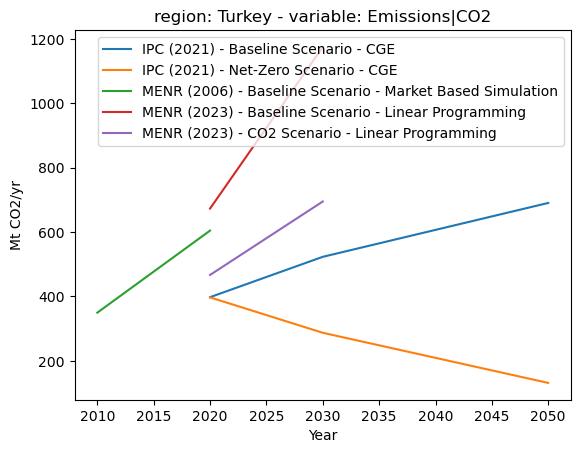

In [53]:
%%capture --no-display
df.filter(variable='Emissions|CO2').plot()

The next two cells perform validation to exclude all scenarios that have implausibly low emissions in 2020 (i.e., unrealistic near-term behaviour) as well as those that do not reduce emissions over the century (i.e., exceed a value of 45000 MT CO2 in any year).

In [54]:
df.validate(criteria={'Emissions|CO2': {'lo': 350, 'year': 2020}}, exclude_on_fail=True)

In [55]:
df.validate(criteria={'Emissions|CO2': {'up': 600, 'year': 2020}}, exclude_on_fail=True)

pyam.core - INFO: 2 of 238 data points do not satisfy the criteria
pyam.core - INFO: 2 non-valid scenarios will be excluded


,model,scenario,region,variable,unit,year,type,value
0,MENR (2006),Baseline Scenario,Turkey,Emissions|CO2,Mt CO2/yr,2020,Market Based Simulation,604.63
1,MENR (2023),Baseline Scenario,Turkey,Emissions|CO2,Mt CO2/yr,2020,Linear Programming,673.00


We can select all scenarios that have *not* been marked to be excluded by adding `exclude=False` to the [filter()](https://pyam-iamc.readthedocs.io/en/stable/api/iamdataframe.html#pyam.IamDataFrame.filter) statement.

To highlight the difference between the full scenario set and the reduced scenario set based on the validation exclusions, the next cell puts the two plots side by side with a shared y-axis.

<AxesSubplot: title={'center': 'Emissions|CO2'}, xlabel='Year', ylabel='Mt CO2/yr'>

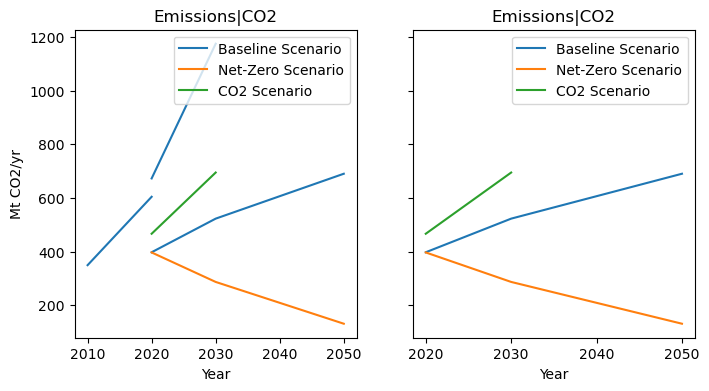

In [57]:
%%capture --no-display
fig, ax = plt.subplots(1, 2, figsize=(8, 4), sharey=True)
df_co2 = df.filter(variable='Emissions|CO2')
df_co2.plot(ax=ax[0],title='Emissions|CO2',color='scenario')
df_co2.filter(exclude=False).plot(ax=ax[1],title='Emissions|CO2',color='scenario')

# Energy Market

The energy market exchange amounts and prices are continuously published by the energy market operator [EPİAŞ Transparency Platform](https://seffaflik.epias.com.tr/transparency/index.xhtml).

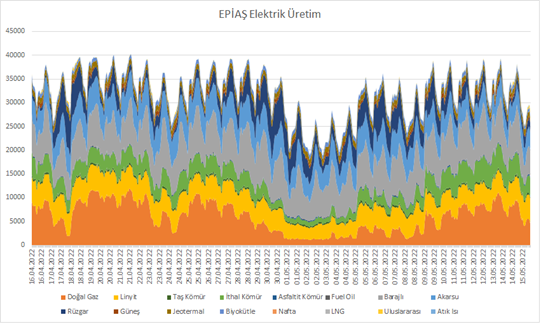 


The one-month period from 16th of April to 16th of May 2022 includes Ramadan holiday where electricity demand is reduced. The market exchange price, which is around the cap during workdays, drops during the holiday period. 

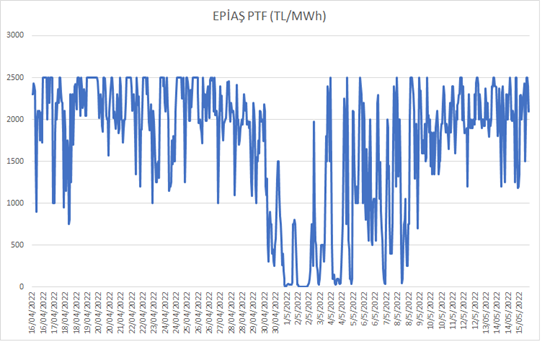

## Energy flows for electricity generation with storage

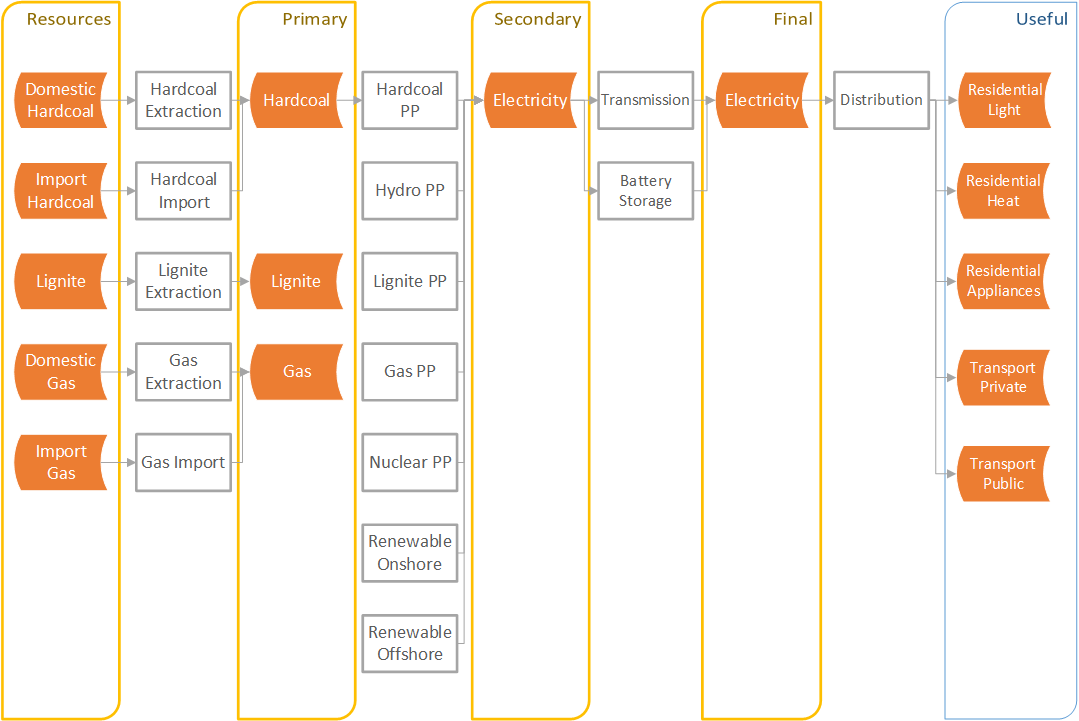

## Further steps

- Include data from recent academic (peer-reviewed) studies based on the net-zero target of Turkey
- Extract meta-data for emissions and related temperature increase using **MAGICC** emulator
- Develop a model for the low carbon transition of the electricity sector 
- Test the hypothesis for utilizing hydrogen and battery storage as a market solution for low carbon transition

## Questions?

Take a look at our [GitHub repository](https://github.com/gorkemgungormetu/turkish_energy_and_climate_pathways.git)!